# Digit Recogniser

## Imports

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
import os

## Data

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/train.csv


**Load data**

In [3]:
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

**Number of train samples by label**

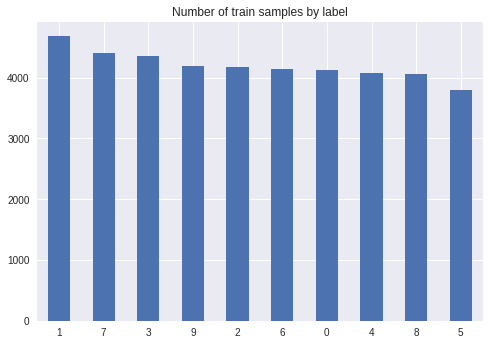

In [4]:
train.label.value_counts().plot.bar(rot=0,title='Number of train samples by label');

**Random Sample to Image**

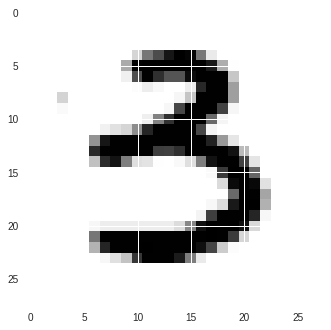

In [5]:
plt.imshow(train[train.columns[1:]].sample(1).values.ravel().reshape(28,28));

**Train / Test data**

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train_, test_ = train_test_split(train,test_size=0.33,random_state=42,stratify=train.label)

**Check if the data it's fair splitted based on label**

In [8]:
'train',train_.label.value_counts() / len(train_),'test',test_.label.value_counts() / len(test_)

('train',
 1    0.111514
 7    0.104797
 3    0.103589
 9    0.099716
 2    0.099467
 6    0.098507
 0    0.098365
 4    0.096944
 8    0.096731
 5    0.090370
 Name: label, dtype: float64,
 'test',
 1    0.111544
 7    0.104762
 3    0.103608
 9    0.099711
 2    0.099423
 6    0.098485
 0    0.098413
 4    0.096970
 8    0.096753
 5    0.090332
 Name: label, dtype: float64)

**KNN**

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [10]:
%%time
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_[train_.columns[1:]],train_['label'])

CPU times: user 4.51 s, sys: 86.7 ms, total: 4.59 s
Wall time: 4.58 s


KNeighborsClassifier(n_neighbors=3)

In [11]:
%%time
knn_results = test_.copy()
knn_results['y_pred'] = knn.predict(test_[test_.columns[1:]])

CPU times: user 10min 6s, sys: 144 ms, total: 10min 6s
Wall time: 10min 6s


In [12]:
print(metrics.classification_report(knn_results.label,knn_results.y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1364
           1       0.95      1.00      0.97      1546
           2       0.98      0.96      0.97      1378
           3       0.96      0.95      0.96      1436
           4       0.96      0.96      0.96      1344
           5       0.95      0.94      0.95      1252
           6       0.98      0.99      0.98      1365
           7       0.96      0.97      0.96      1452
           8       0.98      0.91      0.94      1341
           9       0.95      0.95      0.95      1382

    accuracy                           0.96     13860
   macro avg       0.96      0.96      0.96     13860
weighted avg       0.96      0.96      0.96     13860



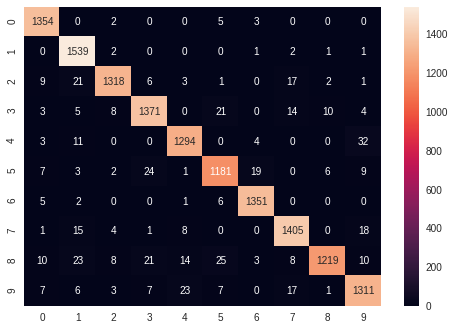

In [13]:
sns.heatmap(metrics.confusion_matrix(knn_results.label,knn_results.y_pred),annot=True,fmt='d');

**XGBoost**

In [14]:
import xgboost as xgb

In [15]:
%%time
xgc = xgb.XGBClassifier(objective='multi:softmax',num_class=train.label.nunique(),n_estimators=300)
xgc.fit(train_[train_.columns[1:]],train_['label'],verbose=1000)

CPU times: user 58min 50s, sys: 5.43 s, total: 58min 55s
Wall time: 15min 4s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=0, num_class=10, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [16]:
%%time
xgc_results = test_.copy()
xgc_results['y_pred'] = xgc.predict(test_[test_.columns[1:]])

CPU times: user 5.01 s, sys: 166 ms, total: 5.17 s
Wall time: 1.46 s


In [17]:
print(metrics.classification_report(xgc_results.label,xgc_results.y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1364
           1       0.99      0.99      0.99      1546
           2       0.96      0.97      0.97      1378
           3       0.98      0.95      0.97      1436
           4       0.98      0.97      0.97      1344
           5       0.97      0.96      0.97      1252
           6       0.98      0.98      0.98      1365
           7       0.96      0.97      0.97      1452
           8       0.96      0.97      0.97      1341
           9       0.96      0.96      0.96      1382

    accuracy                           0.97     13860
   macro avg       0.97      0.97      0.97     13860
weighted avg       0.97      0.97      0.97     13860



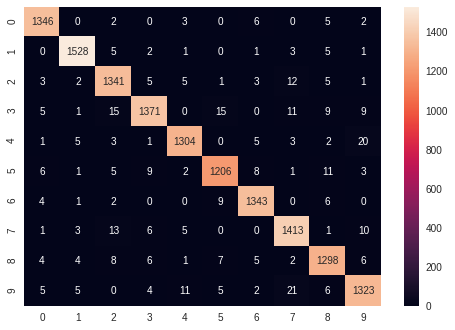

In [18]:
sns.heatmap(metrics.confusion_matrix(xgc_results.label,xgc_results.y_pred),annot=True,fmt='d');

**Train on Full Data then create submission file**

In [19]:
%%time
full_xgc = xgb.XGBClassifier(objective='multi:softmax',num_class=train.label.nunique(),n_estimators=300)
full_xgc.fit(train[train.columns[1:]],train['label'],verbose=1000)

CPU times: user 1h 33min 7s, sys: 7.94 s, total: 1h 33min 15s
Wall time: 23min 52s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=0, num_class=10, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [20]:
%%time
full_xgc_results = test.copy()
full_xgc_results['y_pred'] = full_xgc.predict(test)

CPU times: user 10.3 s, sys: 238 ms, total: 10.5 s
Wall time: 3.07 s


In [21]:
full_xgc_results['ImageId'] = list(range(1,len(test) + 1))
full_xgc_results[['ImageId','y_pred']].rename(columns={'y_pred':'label'}).to_csv('submission.csv',index=False)